# Clustering + TSNE en MNIST

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns

digits = load_digits()

In [66]:
X = digits.data
y = digits.target

## Visualizing the images

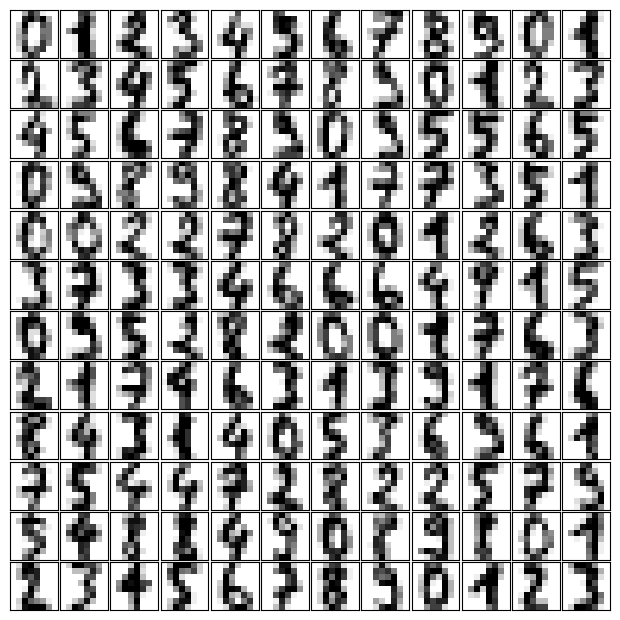

In [67]:
# Configuración de la imágen
fig = plt.figure(figsize=(6, 6))  # Ajustar la figura
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plotear los digitos, son de 8x8
for i in range(144):
    ax = fig.add_subplot(12, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

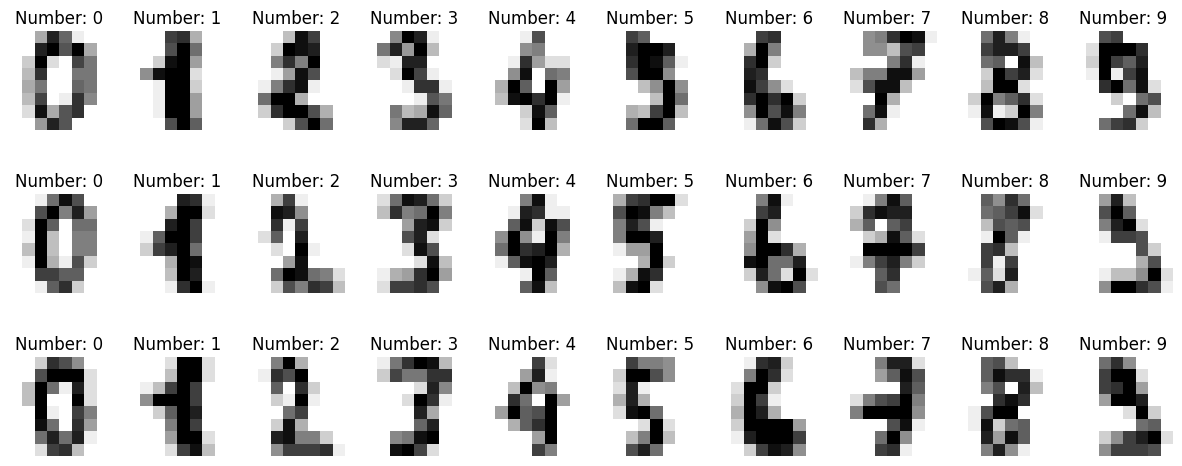

In [68]:
figure, axes = plt.subplots(3,10, figsize=(15,6))

for ax, image, number in zip(axes.ravel(), digits.images, y):
    ax.axis('off')
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('Number: ' + str(number))

## KMeans 

In [69]:
# Number of clusters
k=len(np.unique(y))

# Establishing KMeans 
kmeans = KMeans(n_clusters=k, random_state=92)

# Fitting KMeans
kmeans.fit(X)

KMeans(n_clusters=10, random_state=92)

In [70]:
clusters = kmeans.labels_
np.unique(clusters)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Scores

In [71]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In silhouette score, the best value is 1 and the worst value is -1. While 0.17 is not the greatest performance, it’s decent.

In [72]:
silhouette_score(X, kmeans.fit_predict(X))

0.1766483172647046

For Davies Bouldin, the minimum score is zero, with lower values indicating better clustering. Once again, 2.02 is... not good

In [73]:
davies_bouldin_score(X, clusters)

2.0244028059252095

The centroids identified by our algorithm are the ones as follows:

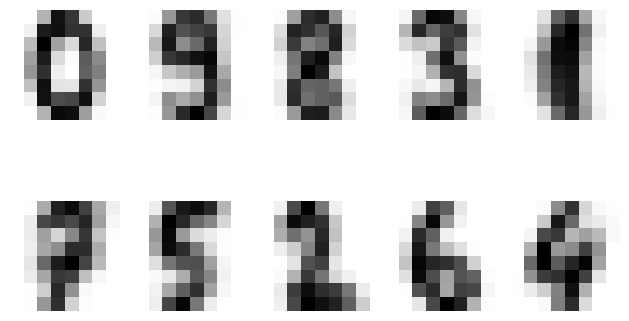

In [74]:
centroids = kmeans.cluster_centers_
# Visualizar cada centroide como una imagen
for i, centroid in enumerate(centroids):
    # Reshape del centroide a una imagen de 8x8
    centroid_image = centroid.reshape(8, 8)
    
    # Subplot para cada centroide
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroid_image, cmap=plt.cm.gray_r)
    plt.axis('off')

plt.tight_layout()
plt.show()

In each cluster, we have a different number. Thus, we can imagine that the clustering is correct.

## TSNE

### 2D Visualization

In [75]:
x_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X)

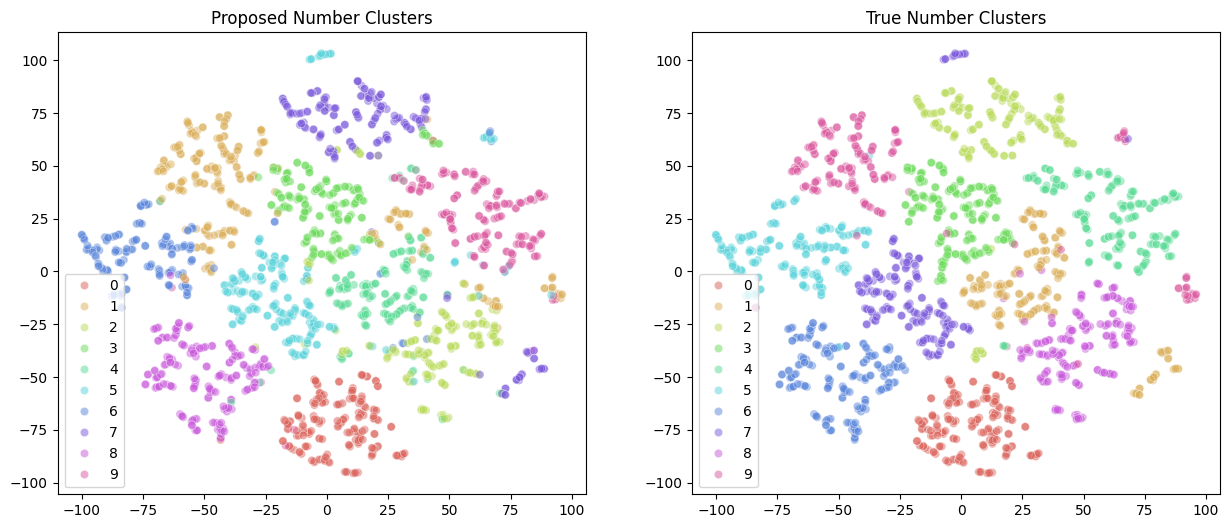

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.scatterplot(
    x= x_embedded[:, 0], y=x_embedded[:, 1],
    hue=clusters,
    palette=sns.color_palette("hls", 10),
    alpha=0.5,
    ax=axes[0],
    ).set(title='Proposed Number Clusters')

sns.scatterplot(
    x= x_embedded[:, 0], y=x_embedded[:, 1],
    hue=y,
    palette=sns.color_palette("hls", 10),
    alpha=0.5,
    ax=axes[1],
    ).set(title='True Number Clusters')

plt.show()

In [77]:
from sklearn.metrics import adjusted_rand_score

# Calcular el ajuste de Rand entre los clusters y las etiquetas verdaderas
accuracy = adjusted_rand_score(y, clusters)

print("Precisión ajustada entre los clusters y las etiquetas verdaderas:", accuracy)

Precisión ajustada entre los clusters y las etiquetas verdaderas: 0.7369974725247016


### 3D Visualization

In [78]:
x_embedded_3d = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(X)

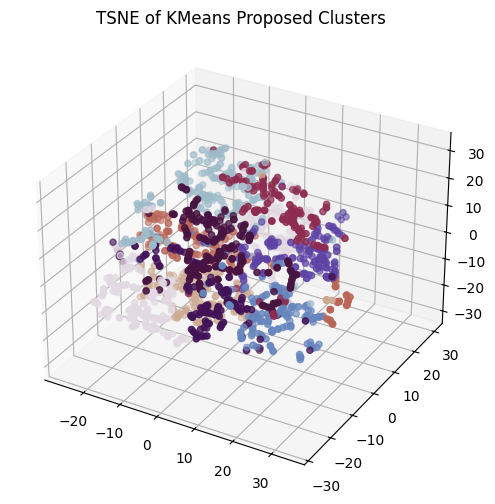

In [83]:
ax = plt.figure(figsize=(6,6)).add_subplot(projection = '3d')
ax.scatter(
    xs= x_embedded_3d[:, 0], 
    ys= x_embedded_3d[:, 1],
    zs= x_embedded_3d[:, 2],
    c=clusters,
    cmap='twilight',
)
plt.title('TSNE of KMeans Proposed Clusters')
plt.show()

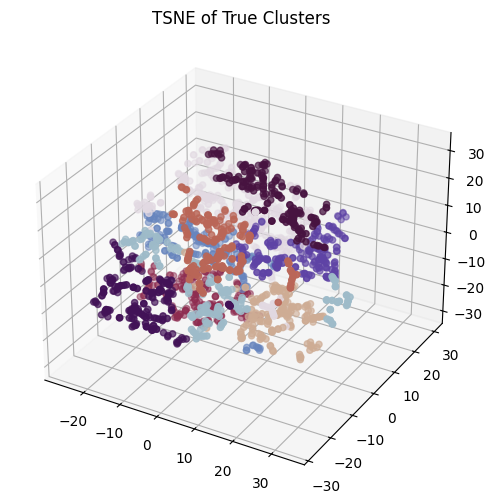

In [84]:
ax = plt.figure(figsize=(6,6)).add_subplot(projection = '3d')
ax.scatter(
    xs= x_embedded_3d[:, 0], 
    ys= x_embedded_3d[:, 1],
    zs= x_embedded_3d[:, 2],
    c=y,
    cmap='twilight',
)
plt.title('TSNE of True Clusters')
plt.show()

### 3D Dynamic Visualization

In [81]:
import plotly.express as px

In [82]:
fig = px.scatter_3d(x=x_embedded_3d[:, 0], y=x_embedded_3d[:, 1], z=x_embedded_3d[:, 2],
              color=clusters)
fig.show()

## Conclusions

Denise and I worked on this together to compare our viewpoints and problem solve. We had various difficulties, namely, normalizing/scaling the data. At the end, we opted not to do it, despite the numerous recommendations to do so. Even then, in comparison to the original targets, we consider a 0.73 a good score. 

Overall, it was an interesting assignment, and we wish we could have had better guidance or knowledge to properly cluster the data.